In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype, is_datetime64_dtype
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
data_folder = 'data/'
listings_1 = pd.read_csv(data_folder + 'listings.csv')
reviews_1 = pd.read_csv(data_folder + 'reviews.csv')
calendar_1 = pd.read_csv(data_folder + 'calendar.csv')
neighborhoods_1 = pd.read_csv(data_folder + 'neighbourhoods.csv')

listings = listings_1.copy()

height has been deprecated.



In [5]:
date_columns = ['first_review', 'last_review', 'calendar_last_scraped', 'host_since', 'last_scraped']
for col in date_columns:
    if not is_datetime64_dtype(listings[col]):
        listings[col] = pd.to_datetime(listings[col])
        
price_columns = ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']
for col in price_columns:
    if not is_numeric_dtype(listings[col]):
        listings[col] = listings[col].str.replace('$', '')
        listings[col] = listings[col].str.replace(',', '')
        listings[col] = listings[col].astype(np.float64)

percentage_columns = ['host_response_rate','host_acceptance_rate']
for col in percentage_columns:
    if not is_numeric_dtype(listings[col]):
        listings[col] = listings[col].str.replace('%', '')
        listings[col] = listings[col].str.replace(',', '')
        listings[col] = listings[col].astype(np.float64)/100
        
boolean_columns = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability','requires_license','instant_bookable','is_business_travel_ready','require_guest_profile_picture','require_guest_phone_verification']
for col in boolean_columns:
    for index,value in listings[col].iteritems():
        if listings[col][index]=='t':
            listings.set_value(index, col, 1.0)
        else:
            listings.set_value(index, col, 0.0)
            

In [6]:
# digitize amenities

amenity=listings['amenities'].apply(lambda x: x.replace('"', '').replace('{', '').replace('}', '').split(','))
amenity_dic={}
for index,value in amenity.iteritems():
    for item in value:
        if item != '':
            if item in amenity_dic.keys():
                amenity_dic[item]=amenity_dic[item]+1
            else:
                amenity_dic[item]=1


# print(amenity_dic)
sLength=len(listings['id'])
for key in amenity_dic:
#     print(key)
    listings[key] = pd.Series(np.zeros(sLength), index=listings.index)

for index,value in amenity.iteritems():
    for item in value:
        listings.set_value(index, item, 1.0)


In [7]:
# digitize cancelation policy
sLength=len(listings['id'])
cancelation_policy={}
for index,value in listings['cancellation_policy'].iteritems():
    if value in cancelation_policy.keys():
        cancelation_policy[value]=cancelation_policy[value]+1
    else:
        cancelation_policy[value]=1
        
print(cancelation_policy)
# {'super_strict_60': 2,'super_strict_30': 44,'strict': 2505, 'moderate': 1174,'flexible': 1145,}


listings['cancellation_policy_num'] = pd.Series(np.zeros(sLength), index=listings.index)
cancelation_policy_convert={'super_strict_60': 0.0,'super_strict_30': 1.0,'strict': 2.0, 'moderate': 3.0,'flexible': 4.0}

# data=listings['cancellation_policy']
# for index,value in data.iteritems():
#     print(value)
for index,value in listings['cancellation_policy'].iteritems():
#     print(value)
    listings.set_value(index, 'cancellation_policy_num', cancelation_policy_convert[value])


{'flexible': 1145, 'super_strict_60': 2, 'super_strict_30': 44, 'moderate': 1174, 'strict': 2505}


In [15]:
# digitize bed type
sLength=len(listings['id'])
bed_type={}
for index,value in listings['bed_type'].iteritems():
    if value in bed_type.keys():
        bed_type[value]=bed_type[value]+1
    else:
        bed_type[value]=1
        
print(bed_type)
# {'super_strict_60': 2,'super_strict_30': 44,'strict': 2505, 'moderate': 1174,'flexible': 1145,}


listings['bed_type_num'] = pd.Series(np.zeros(sLength), index=listings.index)
bed_type_convert={'Real Bed': 0, 'Futon': 1, 'Pull-out Sofa': 2, 'Couch': 3, 'Airbed': 4}

# data=listings['cancellation_policy']
# for index,value in data.iteritems():
#     print(value)
for index,value in listings['bed_type'].iteritems():
#     print(value)
    listings.set_value(index, 'bed_type_num', bed_type_convert[value])



{'Real Bed': 4761, 'Futon': 40, 'Pull-out Sofa': 24, 'Couch': 7, 'Airbed': 38}


In [20]:
# digitize room type
sLength=len(listings['id'])
room_type={}
for index,value in listings['room_type'].iteritems():
    if value in room_type.keys():
        room_type[value]=room_type[value]+1
    else:
        room_type[value]=1
        
print(room_type)
# {'super_strict_60': 2,'super_strict_30': 44,'strict': 2505, 'moderate': 1174,'flexible': 1145,}


listings['room_type_num'] = pd.Series(np.zeros(sLength), index=listings.index)
room_type_convert={'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2}


for index,value in listings['room_type'].iteritems():
#     print(value)
    listings.set_value(index, 'room_type_num', room_type_convert[value])


{'Shared room': 57, 'Private room': 1782, 'Entire home/apt': 3031}


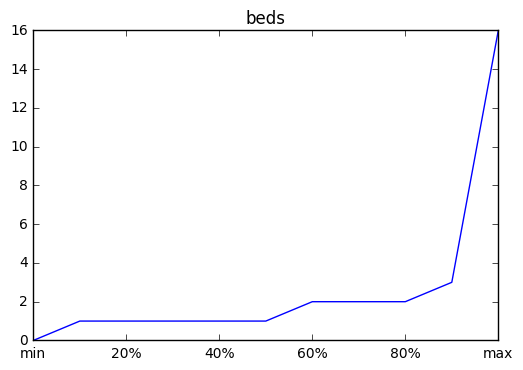

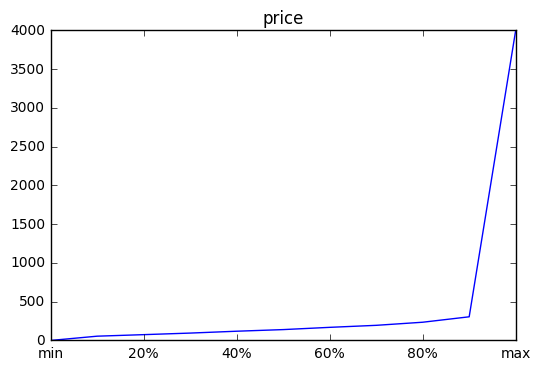

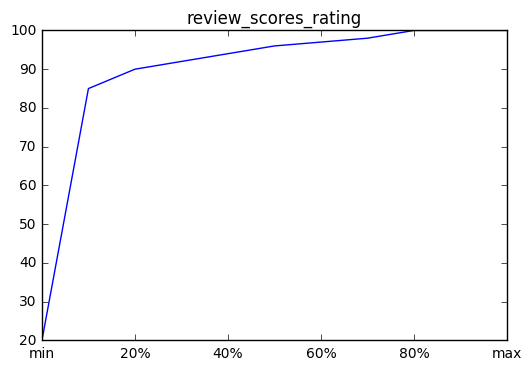

In [8]:
summary_cols = ['beds', 'price', 'review_scores_rating']
for col in summary_cols:
    listings[col].describe(percentiles=np.arange(0.1,1,0.1))[3:].plot()
    plt.title(col)
    plt.show()


In [11]:
listings['amenities'].apply(lambda x: x.replace('"', '').replace('{', '').replace('}', '').split(','))

0       [Wireless Internet, Gym, Heating, Smoke detect...
1       [Wireless Internet, Air conditioning, Kitchen,...
2       [Internet, Wireless Internet, Air conditioning...
3       [TV, Cable TV, Internet, Wireless Internet, Ai...
4       [Wireless Internet, Air conditioning, Kitchen,...
5       [Internet, Wireless Internet, Air conditioning...
6       [TV, Cable TV, Internet, Wireless Internet, Ai...
7       [Wireless Internet, Air conditioning, Kitchen,...
8       [TV, Wireless Internet, Air conditioning, Kitc...
9       [TV, Cable TV, Internet, Wireless Internet, Ai...
10      [Cable TV, Wireless Internet, Air conditioning...
11      [TV, Internet, Wireless Internet, Air conditio...
12      [TV, Wireless Internet, Kitchen, Breakfast, He...
13      [TV, Internet, Wireless Internet, Air conditio...
14      [TV, Cable TV, Internet, Wireless Internet, Ki...
15      [TV, Wireless Internet, Kitchen, Breakfast, He...
16      [TV, Internet, Wireless Internet, Air conditio...
17      [TV, W